In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="deep"
)

In [28]:
df = pd.read_csv("online_retail.csv.csv", encoding="latin1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [29]:
df.shape

(541909, 8)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [31]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [47]:
# Remove missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Remove cancelled invoices
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Keep valid quantity & price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalSales   397884 non-null  float64       
 9   MonthName    397884 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 33.4+ MB


In [33]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
total_revenue = df['TotalSales'].sum()
total_orders = df['InvoiceNo'].nunique()
total_customers = df['CustomerID'].nunique()

total_revenue, total_orders, total_customers

(np.float64(8911407.904), 18532, 4338)

In [35]:
df['MonthName'] = df['InvoiceDate'].dt.month_name()

month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

month_sales = (
    df.groupby('MonthName')['TotalSales']
    .sum()
    .reindex(month_order)
    .reset_index()
)

month_sales

,MonthName,TotalSales
0,January,569445.040
1,February,447137.350
2,March,595500.760
3,April,469200.361
4,May,678594.560
5,June,661213.690
6,July,600091.011
7,August,645343.900
8,September,952838.382
9,October,1039318.790


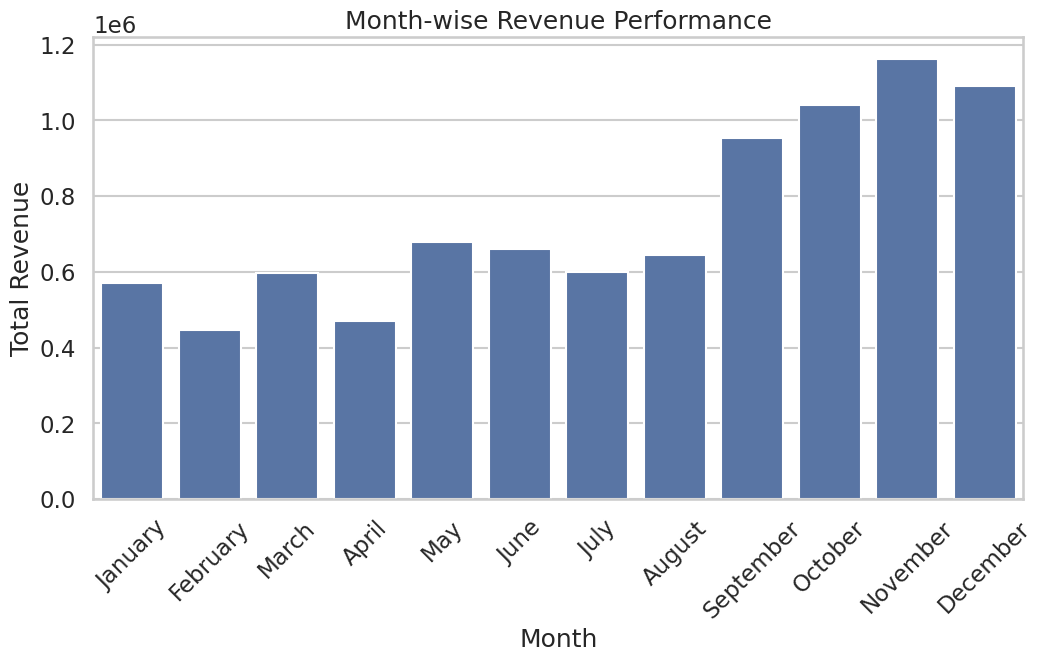

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=month_sales,
    x='MonthName',
    y='TotalSales'
)
plt.title("Month-wise Revenue Performance")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

In [37]:
top_products = (
    df.groupby('Description')['TotalSales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products

,TotalSales
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68844.33
ASSORTED COLOUR BIRD ORNAMENT,56580.34
Manual,53779.93


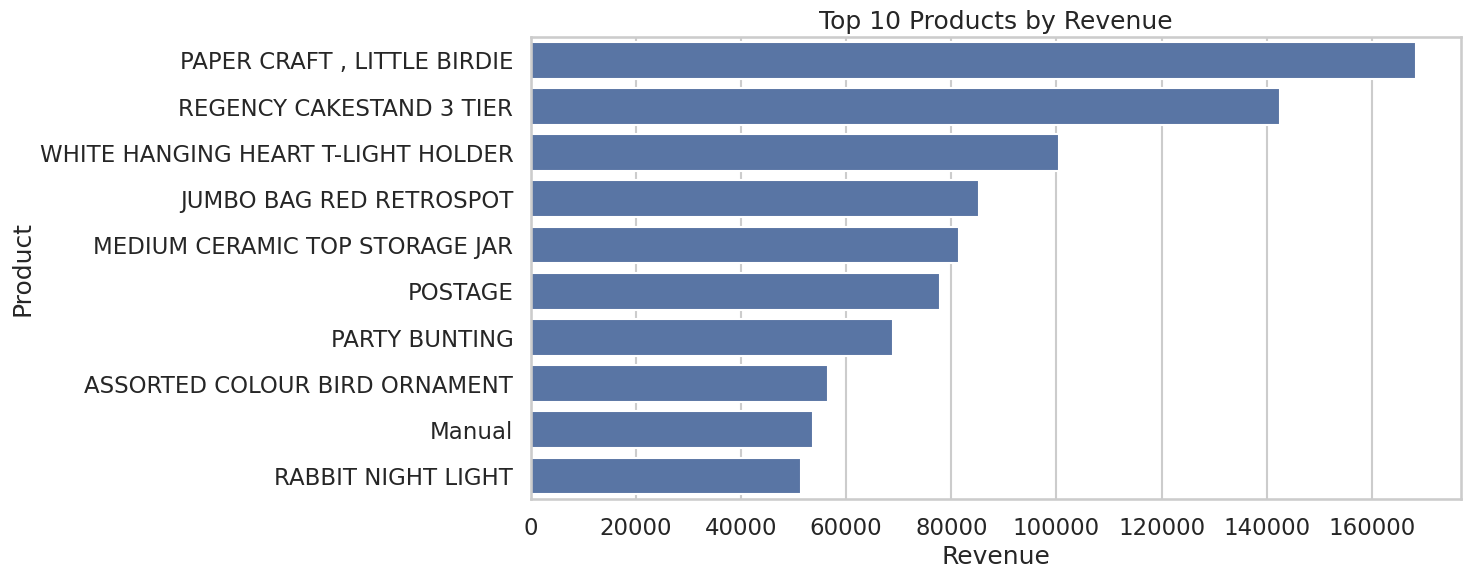

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_products.values,
    y=top_products.index
)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

In [39]:
top_countries = (
    df.groupby('Country')['TotalSales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_countries

,TotalSales
Country,
United Kingdom,7308391.554
Netherlands,285446.340
EIRE,265545.900
Germany,228867.140
France,209024.050
Australia,138521.310
Spain,61577.110
Switzerland,56443.950
Belgium,41196.340


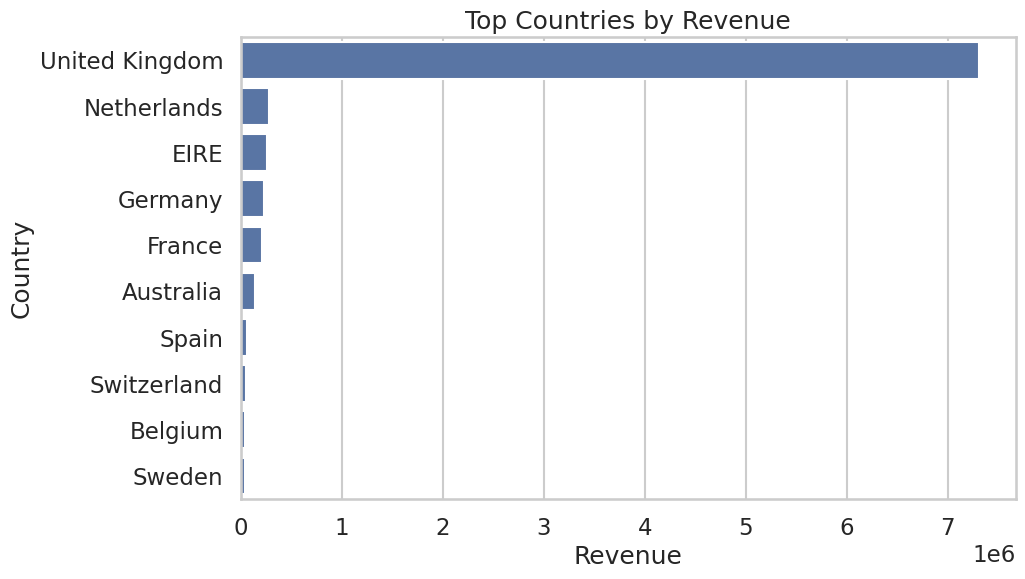

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index
)
plt.title("Top Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()

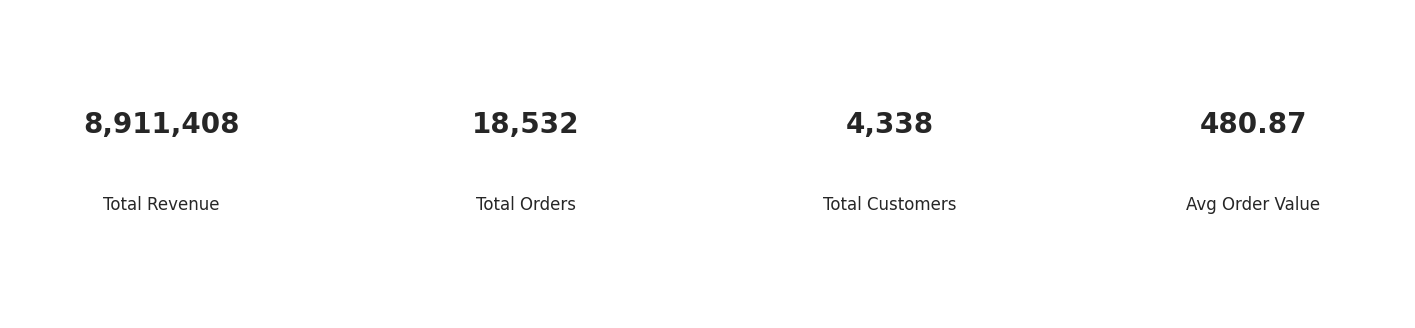

In [41]:
fig, axes = plt.subplots(1, 4, figsize=(18,4))

kpis = [
    ("Total Revenue", f"{total_revenue:,.0f}"),
    ("Total Orders", f"{total_orders:,}"),
    ("Total Customers", f"{total_customers:,}"),
    ("Avg Order Value", f"{(total_revenue/total_orders):,.2f}")
]

for ax, (title, value) in zip(axes, kpis):
    ax.axis("off")
    ax.text(0.5, 0.6, value, fontsize=20, fontweight="bold", ha="center")
    ax.text(0.5, 0.35, title, fontsize=12, ha="center")
    ax.add_patch(plt.Rectangle((0,0),1,1, fill=False, lw=2))
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

plt.show()

In [42]:
monthly_sales = (
    df.set_index('InvoiceDate')
    .resample('M')['TotalSales']
    .sum()
    .reset_index()
)

/tmp/ipython-input-1466702956.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['TotalSales']


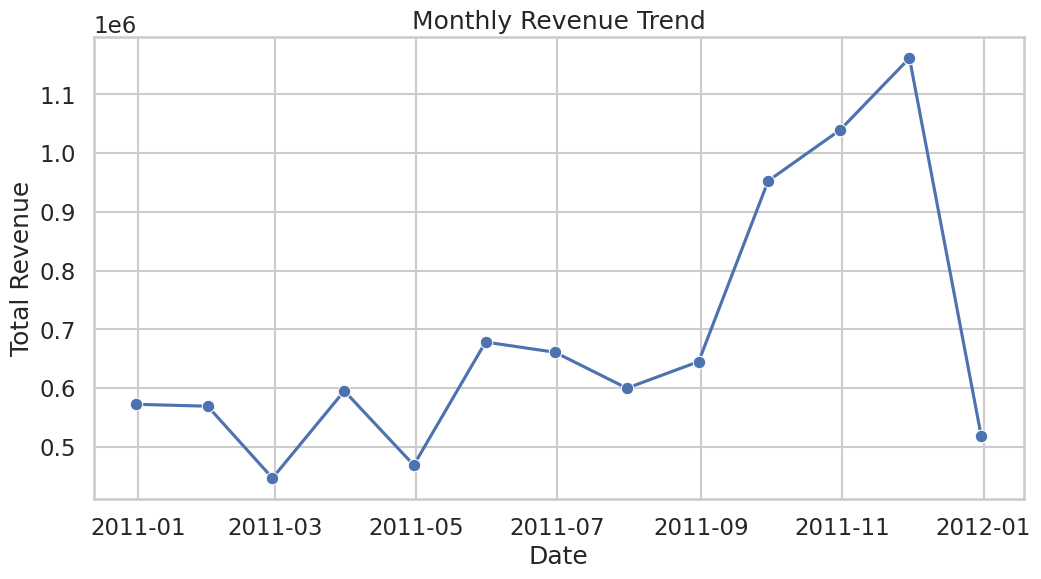

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_sales,
    x='InvoiceDate',
    y='TotalSales',
    marker='o'
)
plt.title("Monthly Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.show()

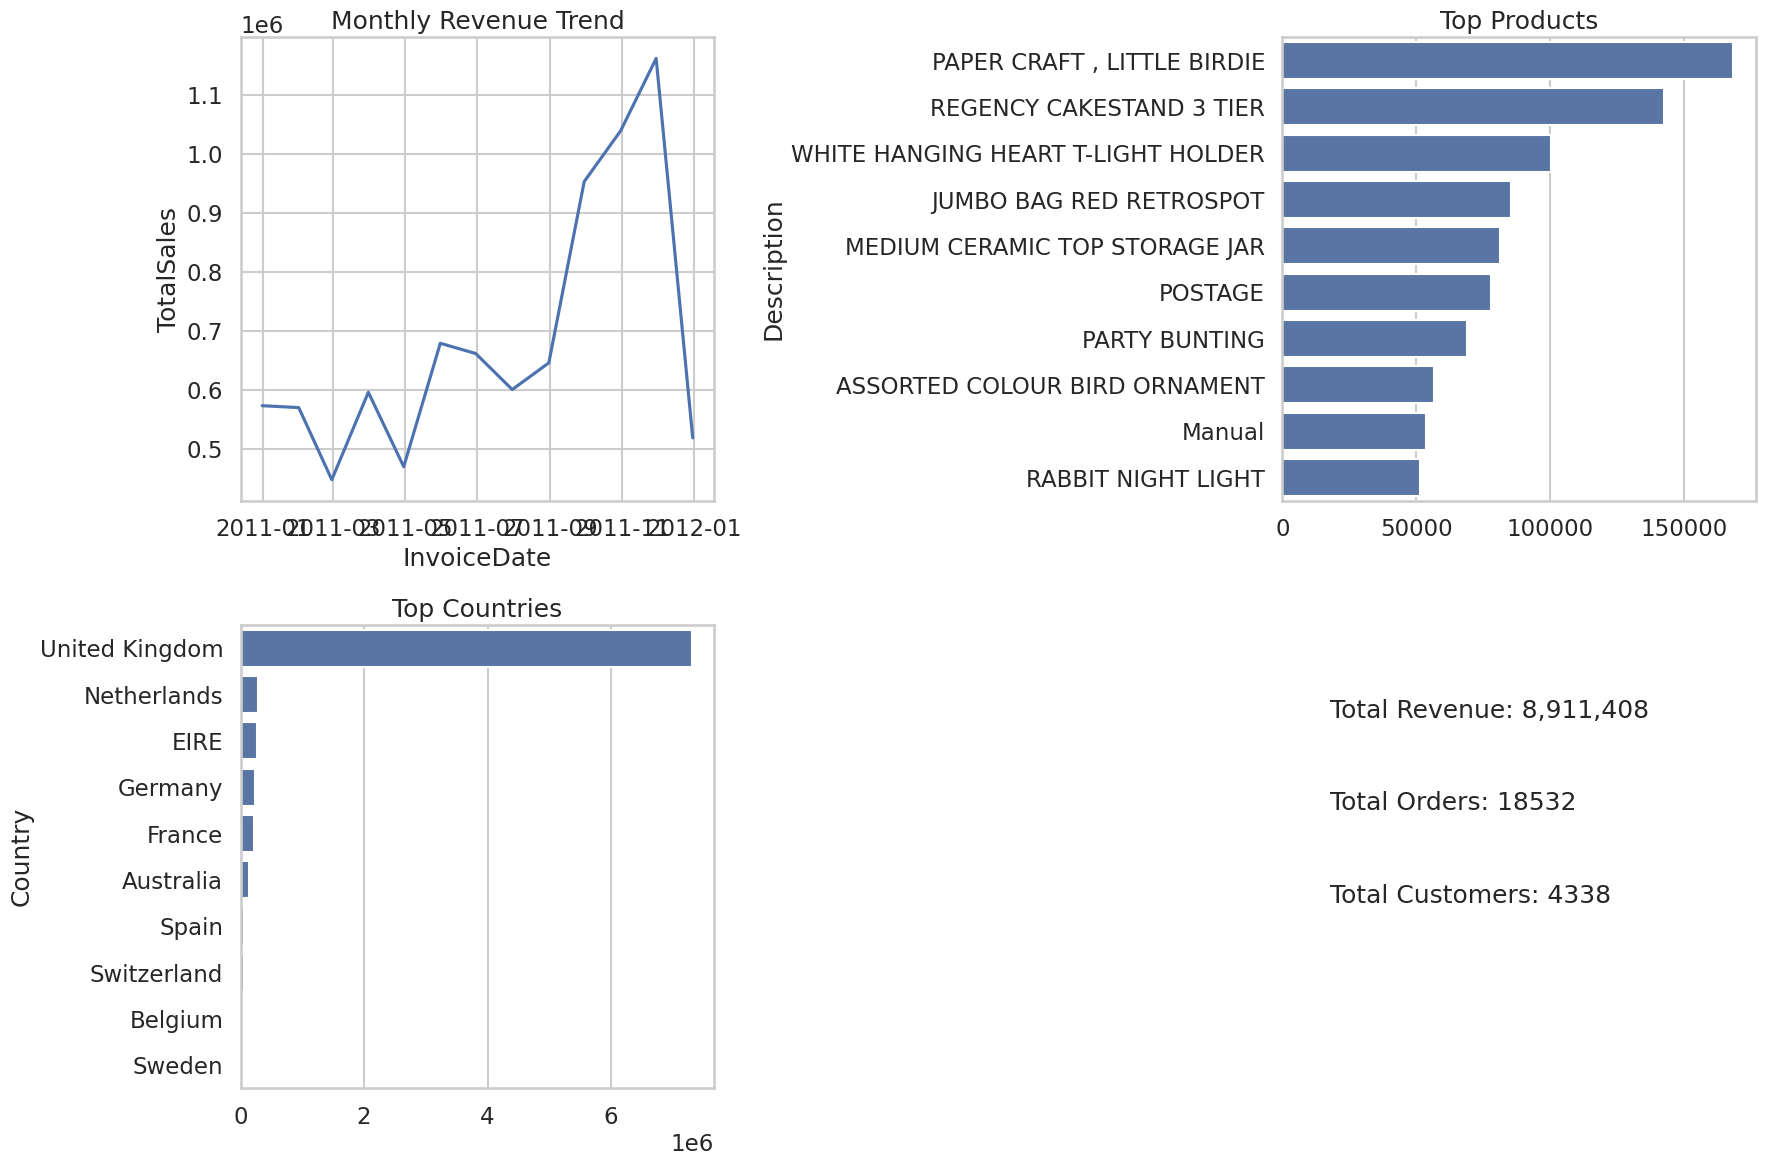

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(18,12))

# Revenue Trend
sns.lineplot(
    data=monthly_sales,
    x='InvoiceDate',
    y='TotalSales',
    ax=axes[0,0]
)
axes[0,0].set_title("Monthly Revenue Trend")

# Top Products
sns.barplot(
    x=top_products.values,
    y=top_products.index,
    ax=axes[0,1]
)
axes[0,1].set_title("Top Products")

# Top Countries
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    ax=axes[1,0]
)
axes[1,0].set_title("Top Countries")

# KPI Display
axes[1,1].axis('off')
axes[1,1].text(0.1, 0.8, f"Total Revenue: {total_revenue:,.0f}")
axes[1,1].text(0.1, 0.6, f"Total Orders: {total_orders}")
axes[1,1].text(0.1, 0.4, f"Total Customers: {total_customers}")

plt.tight_layout()
plt.show()

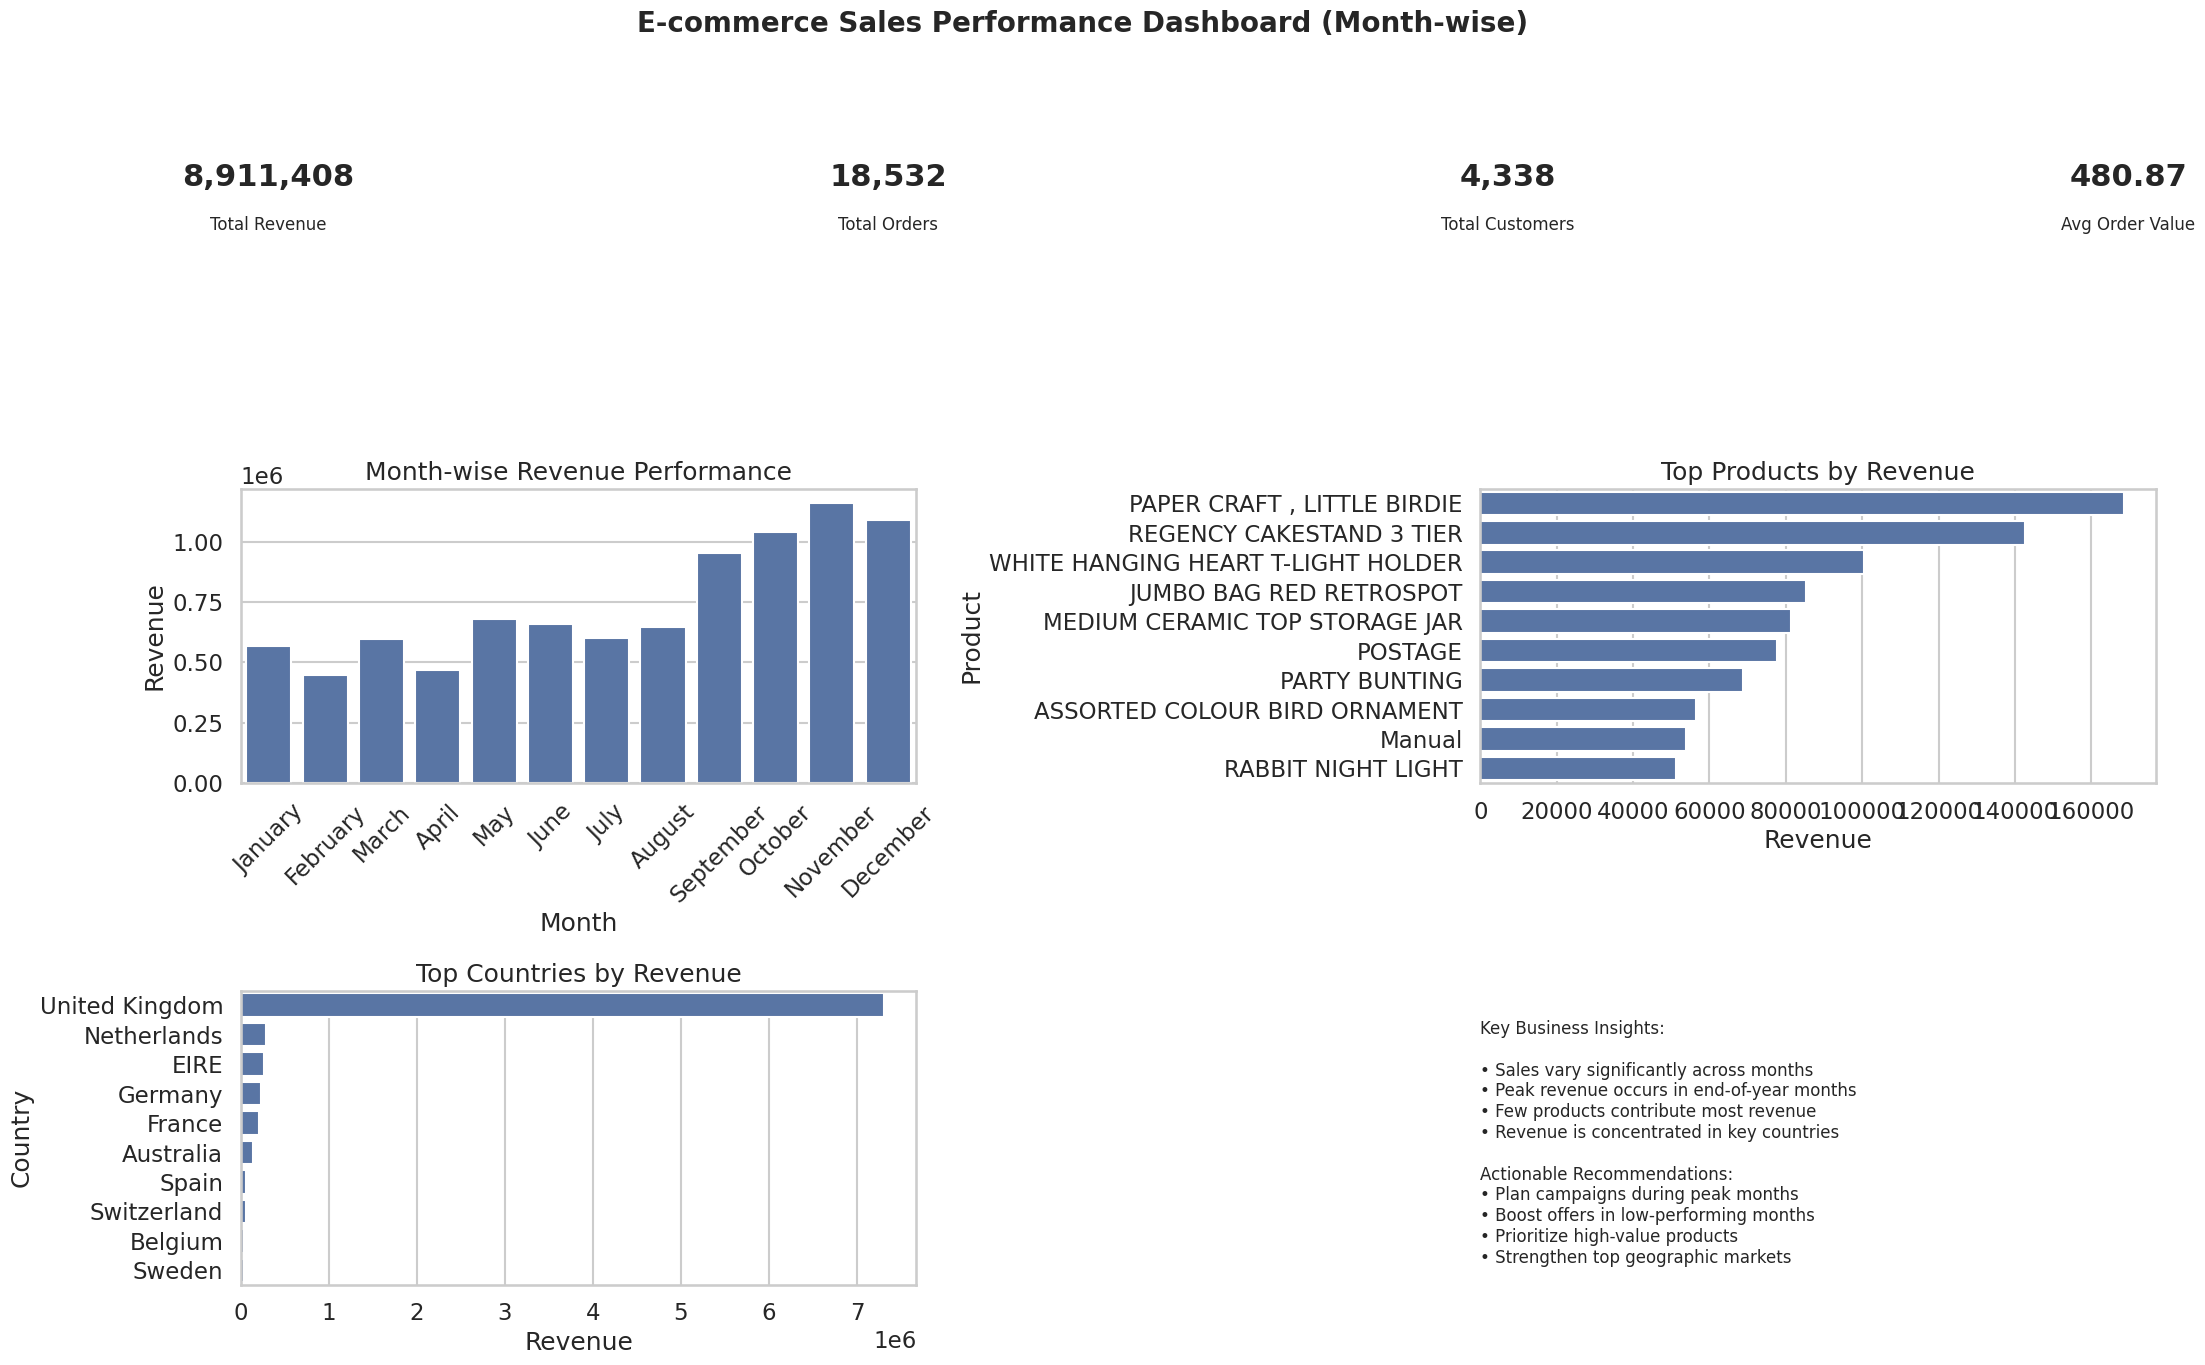

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


df['MonthName'] = df['InvoiceDate'].dt.month_name()

month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

month_sales = (
    df.groupby('MonthName')['TotalSales']
    .sum()
    .reindex(month_order)
    .reset_index()
)

fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(3, 4, height_ratios=[1, 2, 2])

kpis = [
    ("Total Revenue", f"{total_revenue:,.0f}"),
    ("Total Orders", f"{total_orders:,}"),
    ("Total Customers", f"{total_customers:,}"),
    ("Avg Order Value", f"{(total_revenue/total_orders):,.2f}")
]

for i, (title, value) in enumerate(kpis):
    ax = fig.add_subplot(gs[0, i])
    ax.axis("off")
    ax.text(0.5, 0.65, value, fontsize=22, fontweight="bold", ha="center")
    ax.text(0.5, 0.35, title, fontsize=12, ha="center")
    ax.add_patch(plt.Rectangle((0,0),1,1, fill=False, lw=2))
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)


ax1 = fig.add_subplot(gs[1, 0:2])
sns.barplot(
    data=month_sales,
    x="MonthName",
    y="TotalSales",
    ax=ax1
)
ax1.set_title("Month-wise Revenue Performance")
ax1.set_xlabel("Month")
ax1.set_ylabel("Revenue")
ax1.tick_params(axis='x', rotation=45)


ax2 = fig.add_subplot(gs[1, 2:4])
sns.barplot(
    x=top_products.values,
    y=top_products.index,
    ax=ax2
)
ax2.set_title("Top Products by Revenue")
ax2.set_xlabel("Revenue")
ax2.set_ylabel("Product")


ax3 = fig.add_subplot(gs[2, 0:2])
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    ax=ax3
)
ax3.set_title("Top Countries by Revenue")
ax3.set_xlabel("Revenue")
ax3.set_ylabel("Country")


ax4 = fig.add_subplot(gs[2, 2:4])
ax4.axis("off")
ax4.text(
    0, 0.9,
    "Key Business Insights:\n\n"
    "• Sales vary significantly across months\n"
    "• Peak revenue occurs in end-of-year months\n"
    "• Few products contribute most revenue\n"
    "• Revenue is concentrated in key countries\n\n"
    "Actionable Recommendations:\n"
    "• Plan campaigns during peak months\n"
    "• Boost offers in low-performing months\n"
    "• Prioritize high-value products\n"
    "• Strengthen top geographic markets",
    fontsize=12,
    va="top"
)


plt.suptitle(
    "E-commerce Sales Performance Dashboard (Month-wise)",
    fontsize=20,
    fontweight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

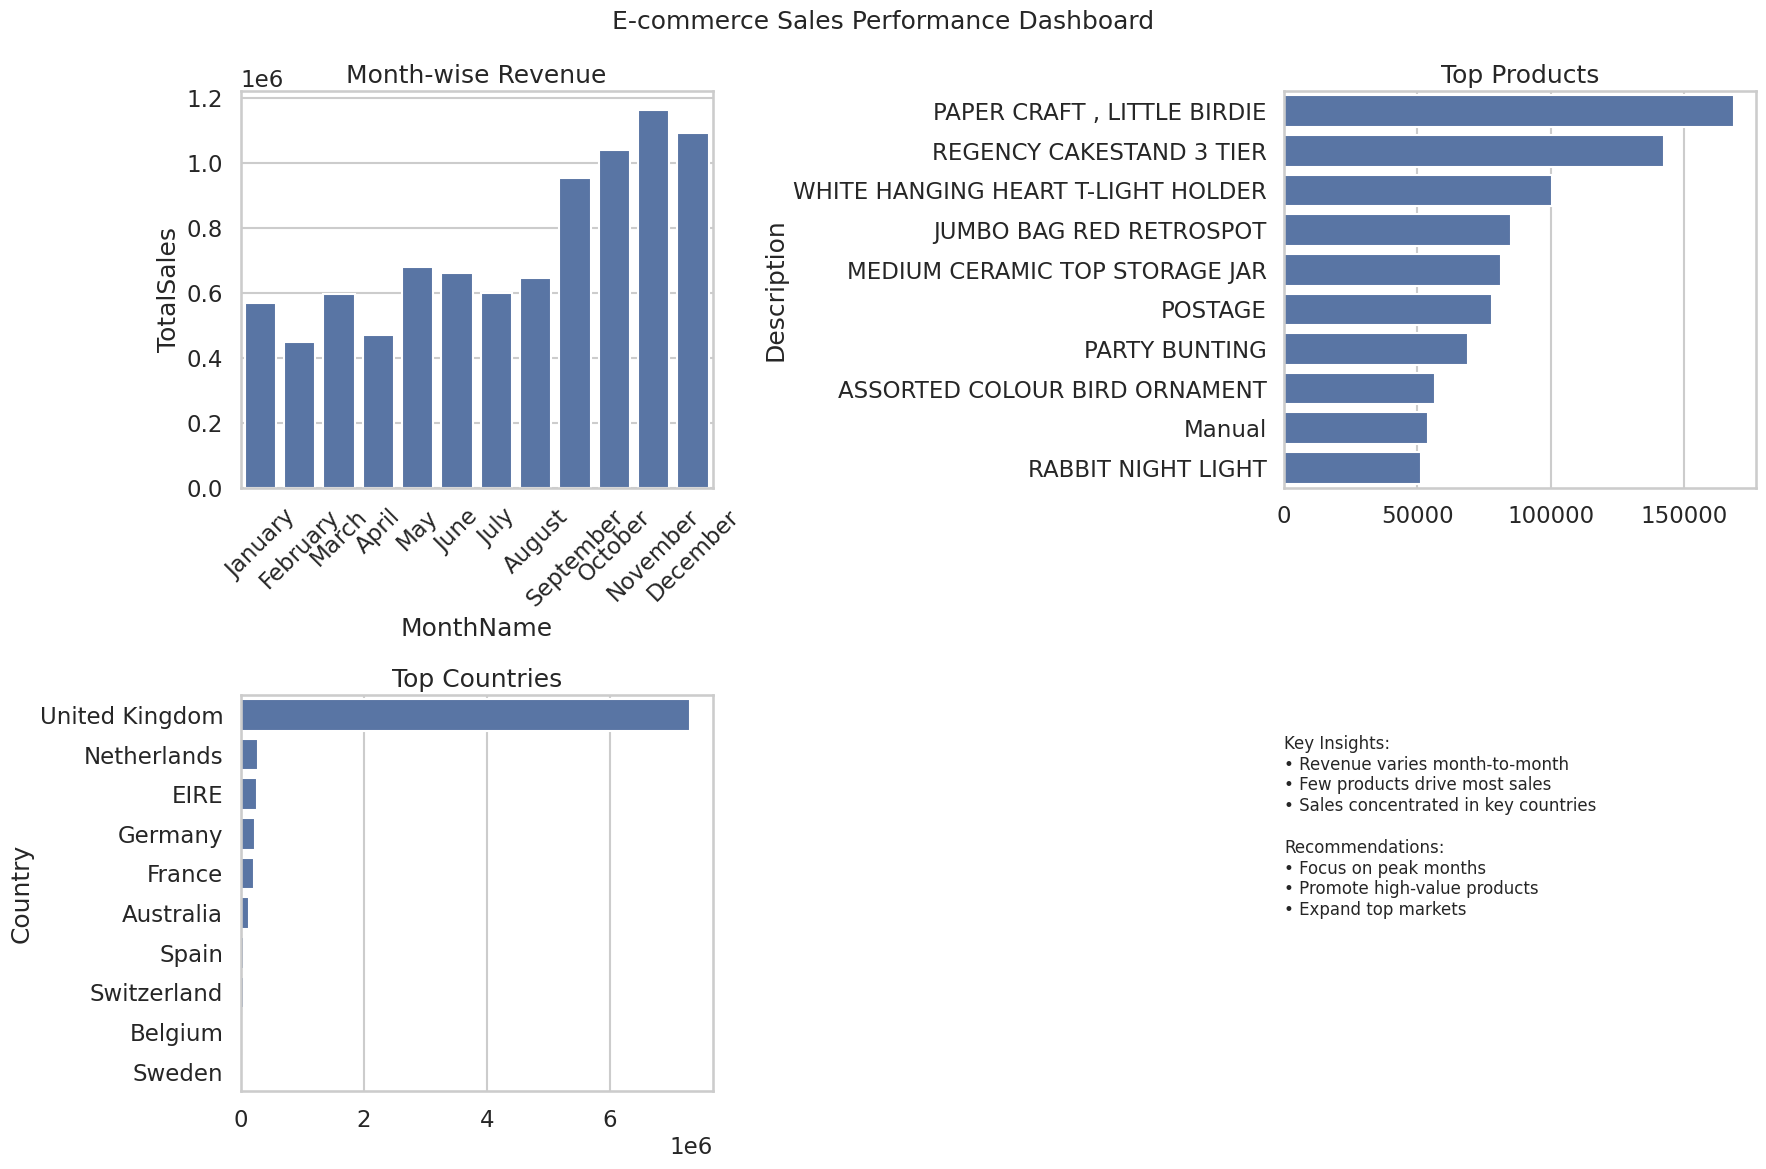

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(18,12))

sns.barplot(data=month_sales, x='MonthName', y='TotalSales', ax=axes[0,0])
axes[0,0].set_title("Month-wise Revenue")
axes[0,0].tick_params(axis='x', rotation=45)

sns.barplot(x=top_products.values, y=top_products.index, ax=axes[0,1])
axes[0,1].set_title("Top Products")

sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[1,0])
axes[1,0].set_title("Top Countries")

axes[1,1].axis("off")
axes[1,1].text(
    0, 0.9,
    "Key Insights:\n"
    "• Revenue varies month-to-month\n"
    "• Few products drive most sales\n"
    "• Sales concentrated in key countries\n\n"
    "Recommendations:\n"
    "• Focus on peak months\n"
    "• Promote high-value products\n"
    "• Expand top markets",
    fontsize=12,
    va="top"
)

plt.suptitle("E-commerce Sales Performance Dashboard", fontsize=18)
plt.tight_layout()
plt.show()

#Final Business Insights
- Sales show strong seasonal patterns
- Top products contribute majority of revenue
- Business is highly dependent on a few key markets

# Actionable Recommendations
- Increase promotions during peak months
- Ensure inventory availability for top products
- Expand operations in high-revenue countries